Decision Tree

Tiatnic Survival Dataset

In [8]:
#Import the Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [9]:
#Load the data sets- train and test
train_df = pd.read_csv("train_titanic.csv")

In [10]:
#Look at top values of train data 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#Print the column names of train data
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
#Print the dimension of train and test data
train_df.shape

(891, 12)

In [13]:
#Print the number of missing values in each column of train and test data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

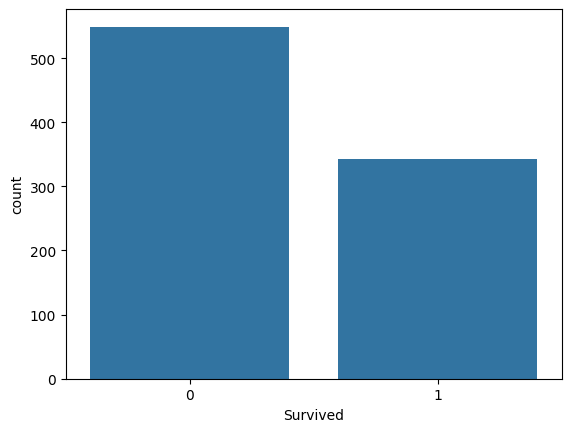

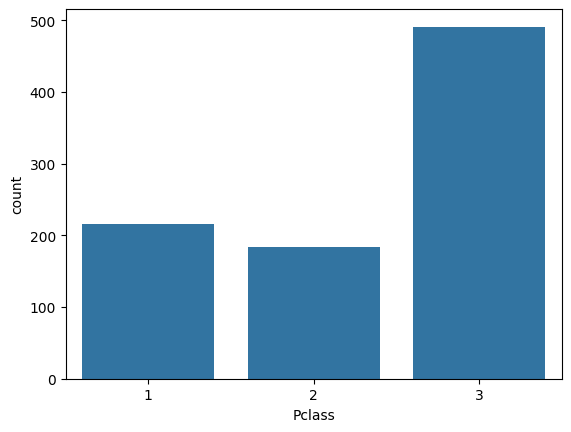

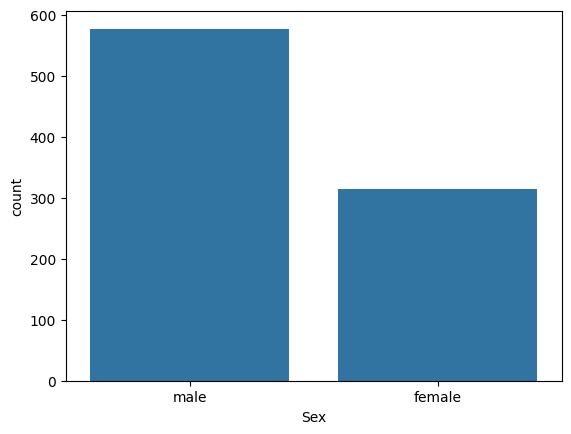

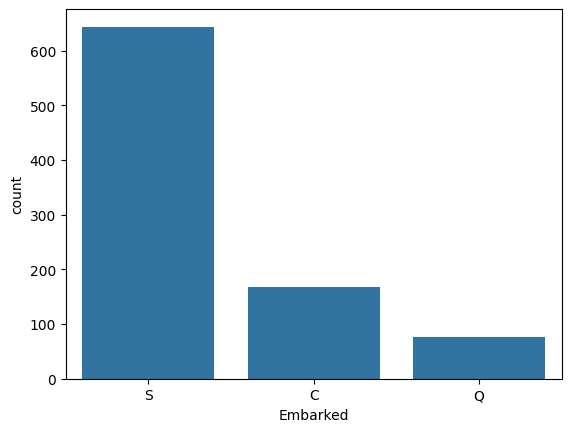

In [17]:
#Barchart of Survived, Pclass, Sex, Embarked
sns.countplot(x='Survived', data=train_df)
plt.show()

sns.countplot(x='Pclass', data=train_df)
plt.show()

sns.countplot(x='Sex', data=train_df)
plt.show()

sns.countplot(x='Embarked', data=train_df)
plt.show()

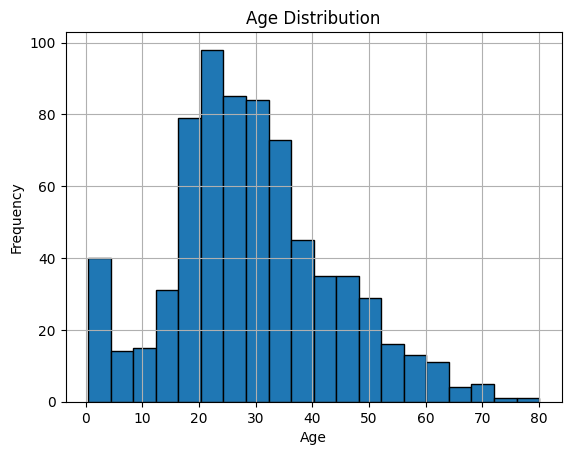

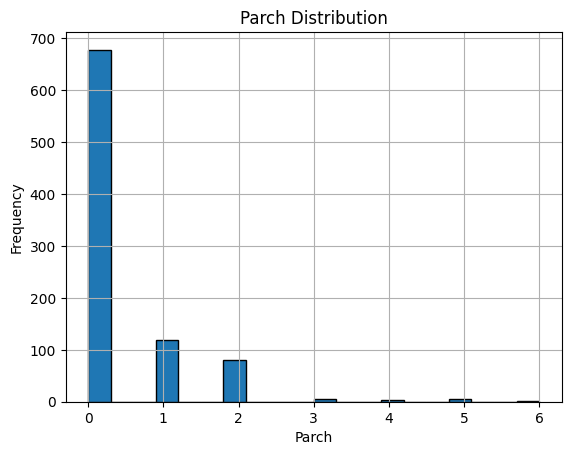

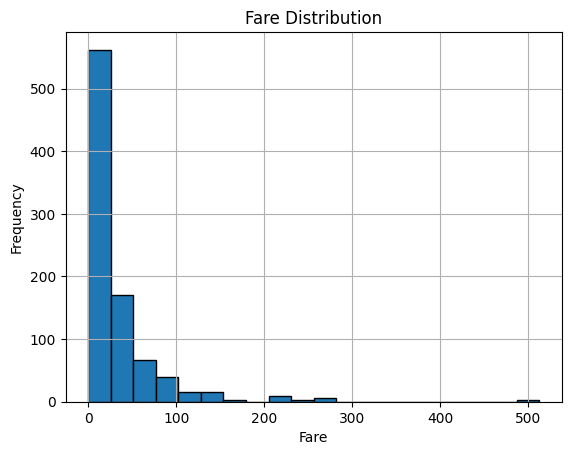

In [18]:
#Histogram of Age, Parch, Fare
train_df['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

train_df['Parch'].hist(bins=20, edgecolor='black')
plt.title('Parch Distribution')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.show()

train_df['Fare'].hist(bins=20, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

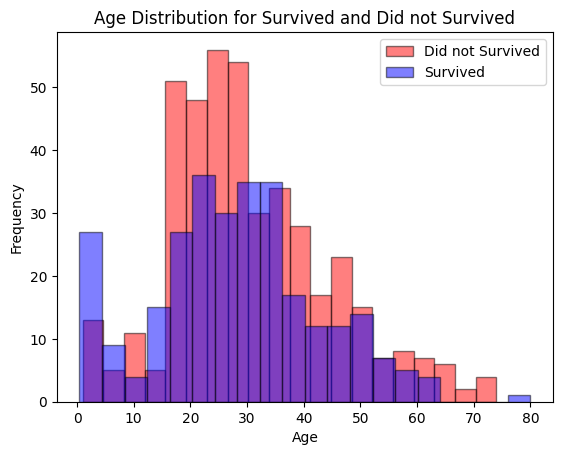

In [19]:
#Plot histogram of age for survived and did not survived class
plt.hist(train_df[train_df['Survived']==0]['Age'], bins=20, edgecolor='black', alpha=0.5, color='red', label='Did not Survived')
plt.hist(train_df[train_df['Survived']==1]['Age'], bins=20, edgecolor='black', alpha=0.5, color='blue', label='Survived')
plt.legend()
plt.title('Age Distribution for Survived and Did not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

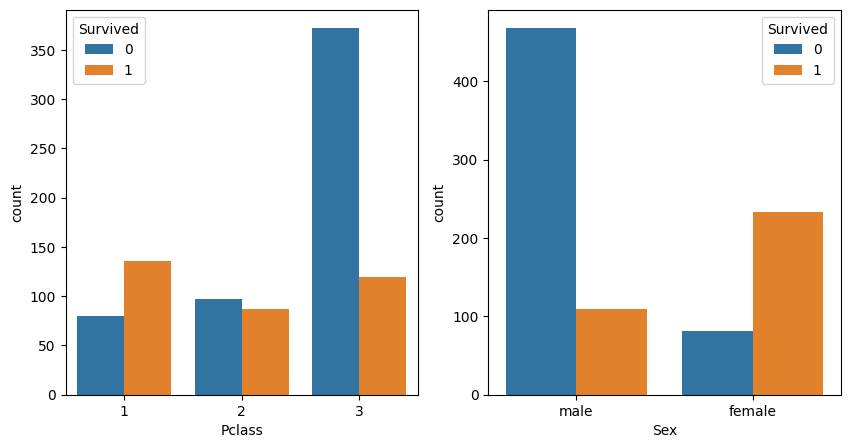

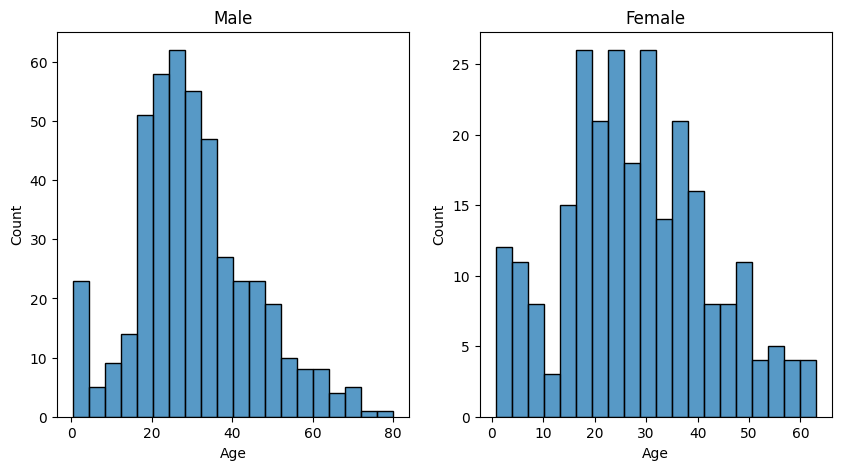

In [24]:
#Count class and geder wise survival rate - plot with appropriate chart
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=train_df, ax=ax[0])
sns.countplot(x='Sex', hue='Survived', data=train_df, ax=ax[1])
plt.show()
#Age wise Distribution of Male and Female passengers
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(train_df[train_df["Sex"]=="male"]["Age"], bins=20, edgecolor='black', ax=ax[0])
ax[0].set_title("Male")
sns.histplot(train_df[train_df["Sex"]=="female"]["Age"], bins=20, edgecolor='black', ax=ax[1])
ax[1].set_title("Female")
plt.show()


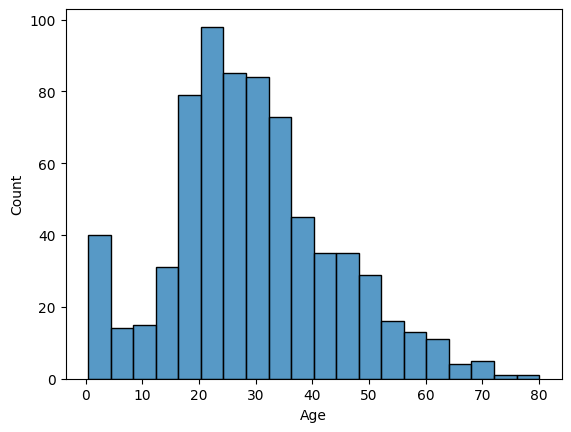

In [26]:
#Histogram of Age of the given data set(sample)
sns.histplot(train_df['Age'], bins=20, edgecolor='black')
plt.show()

## Handling Missing Values

In [27]:
#Replace the msiing values in Embarked column by 'S'
train_df['Embarked'].fillna('S', inplace=True)

C:\Users\E.NILESH\AppData\Local\Temp\ipykernel_10716\1642084052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna('S', inplace=True)


In [28]:
#Impute the missing values in Fare column with median value
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

C:\Users\E.NILESH\AppData\Local\Temp\ipykernel_10716\2944801917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)


In [ ]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
age_mean = train_df['Age'].mean()
age_std = train_df['Age'].std()
age_null_count = train_df['Age'].isnull().sum()

age_random_list = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_null_count)
train_df.loc[np.isnan(train_df['Age']), 'Age'] = age_random_list
train_df['Age'] = train_df['Age'].astype(int)

## Feature Engineering - Creating new features

In [30]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
train_df['FamilySize'] = train_df['Parch'] + train_df['SibSp'] + 1

In [ ]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0

C:\Users\E.NILESH\AppData\Local\Temp\ipykernel_10716\510704615.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0
C:\Users\E.NILESH\AppData\Local\Temp\ipykernel_10716\510704615.py:4: S

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [33]:
# Create a new attribute Has_cabin using the attribute Cabin.
# if Cabin == NaN then Has_cabin = 0 else Has_cabin = 1
train_df['Has_cabin'] = train_df['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [34]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Model Building

In [35]:
#Prepare X and y
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [36]:
# Label encoding of categorical features
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

In [37]:
# concat df_categorical with original df
X = pd.concat([X, pd.get_dummies(X['Pclass'], prefix='Pclass')], axis=1)
X.drop('Pclass', axis=1, inplace=True)

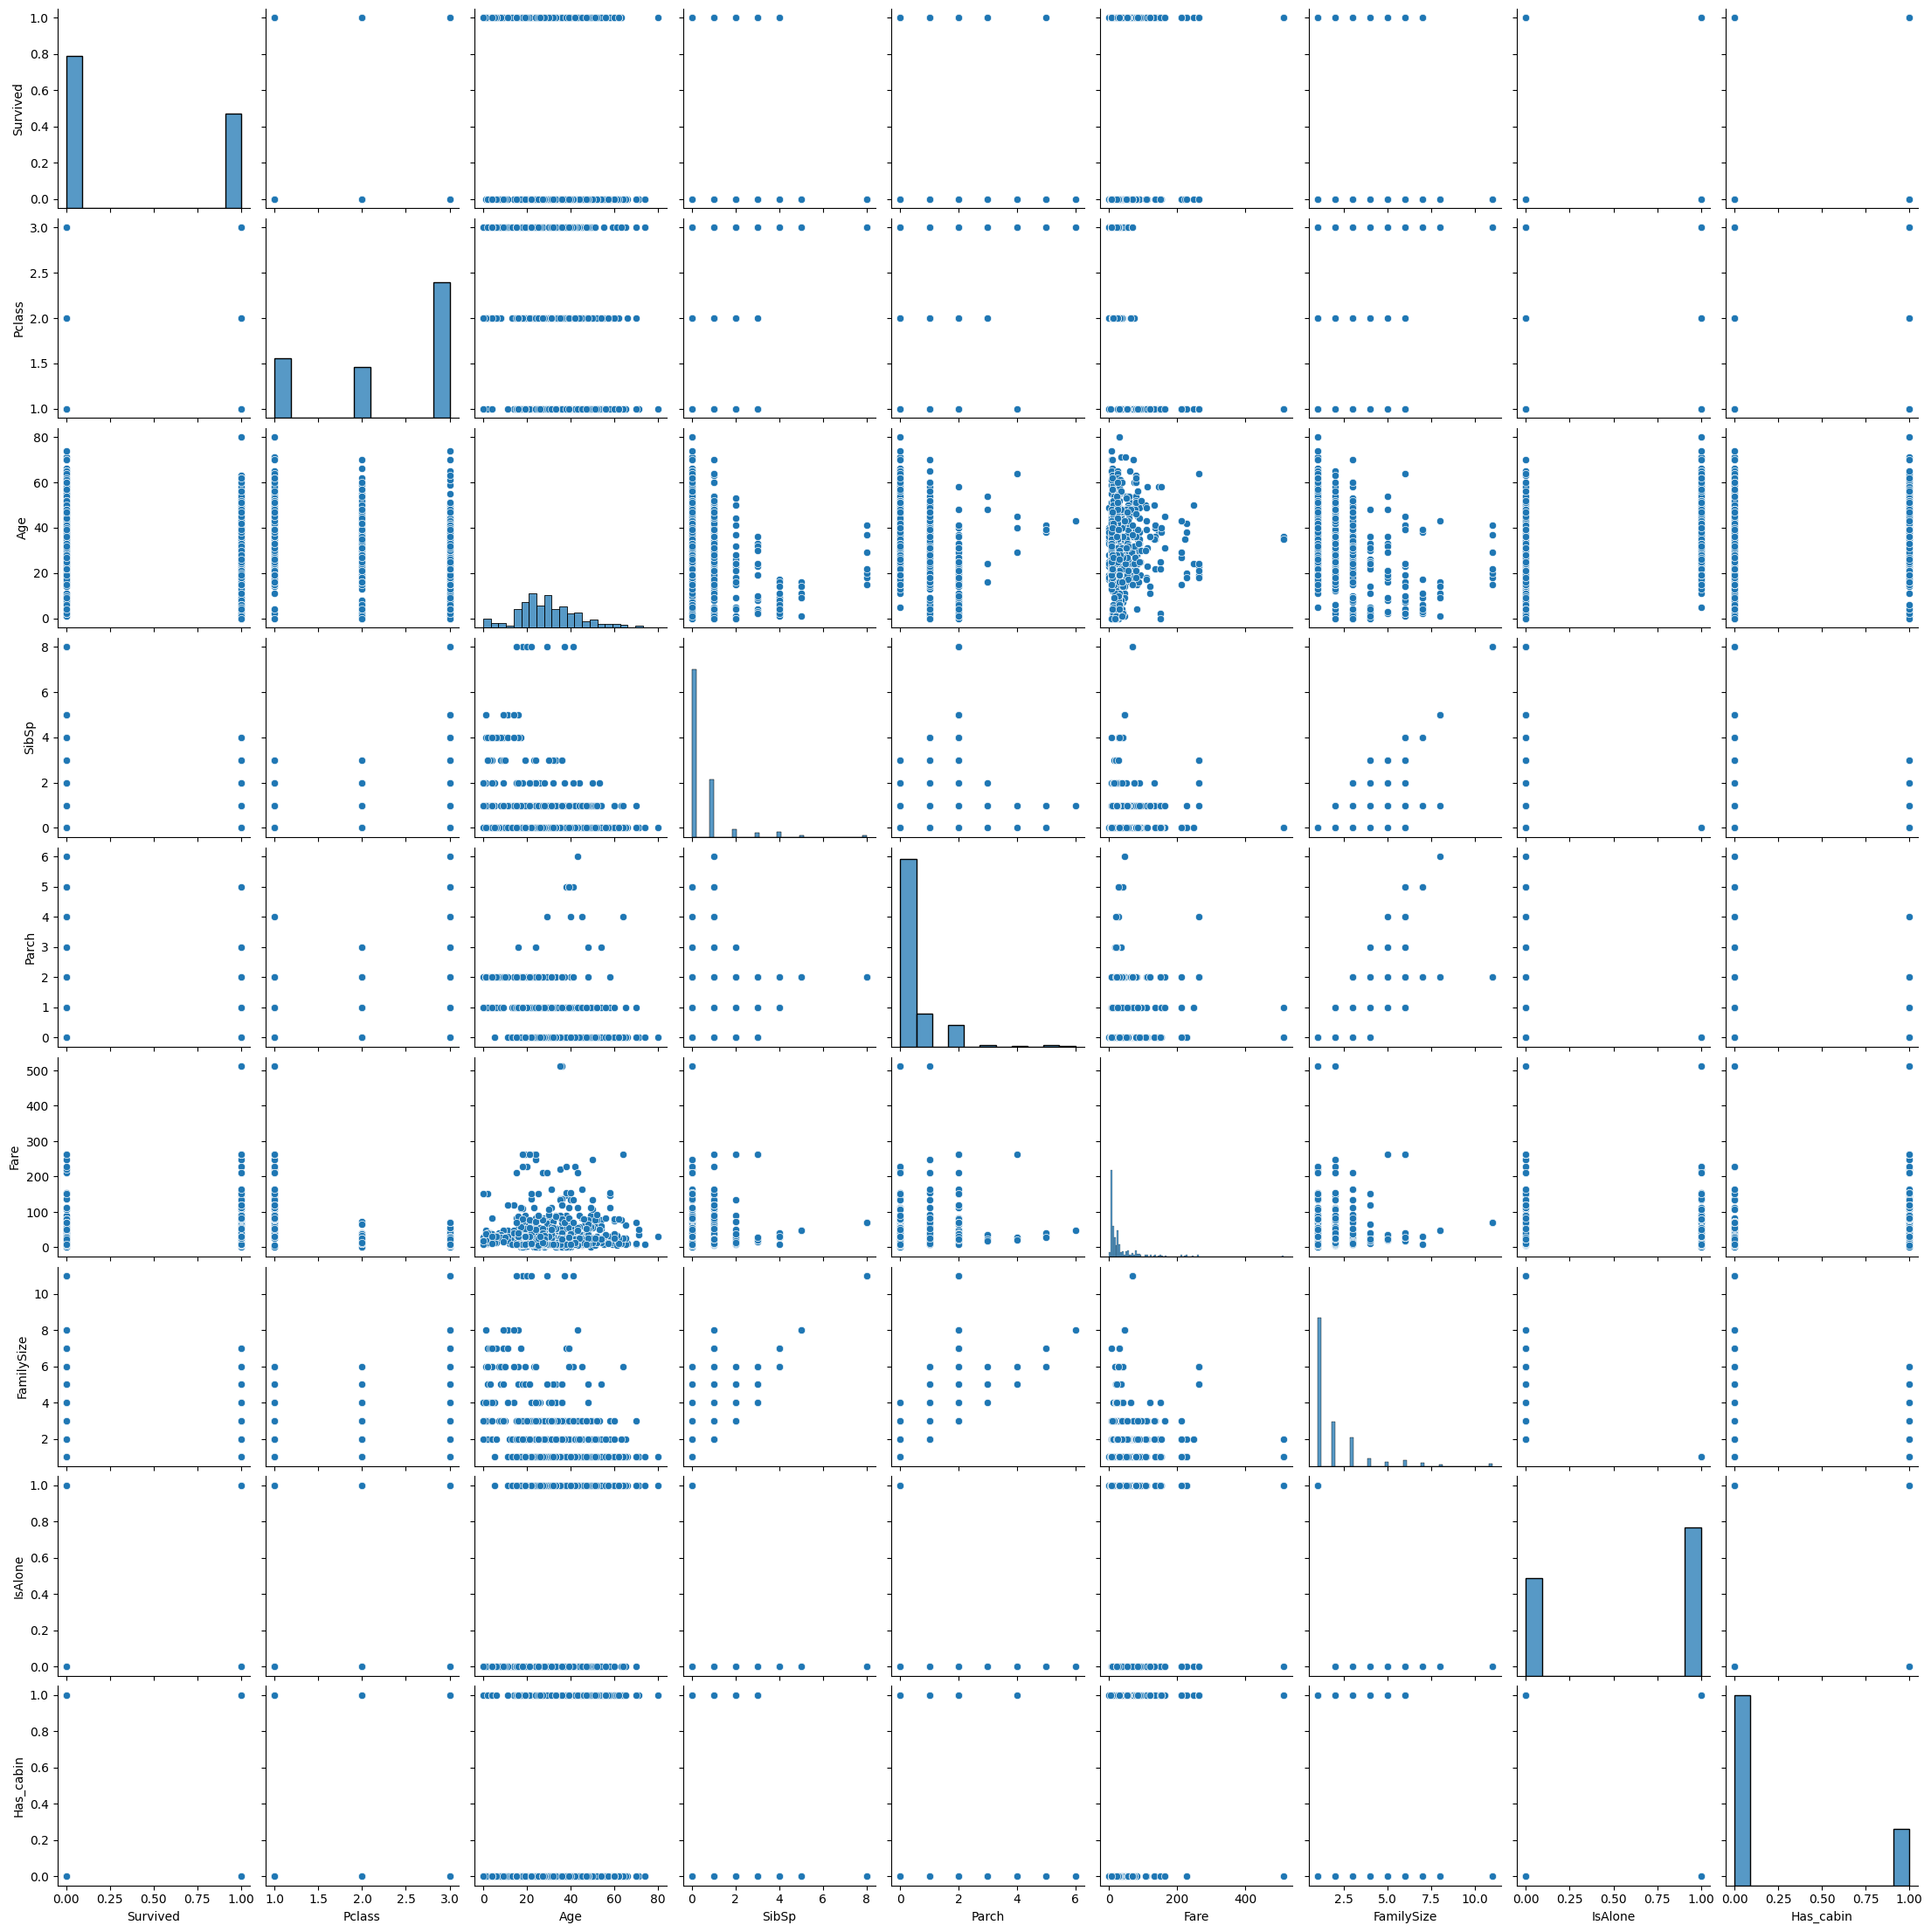

In [38]:
#Do a pairplot of all features
sns.pairplot(train_df)
plt.show()

In [39]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42)


In [40]:
# Create the model
model = DecisionTreeClassifier(random_state=42)
# Fitting the decision tree with default hyperparameters
model.fit(X_train, y_train)
# Importing decision tree classifier from sklearn library


DecisionTreeClassifier(random_state=42)

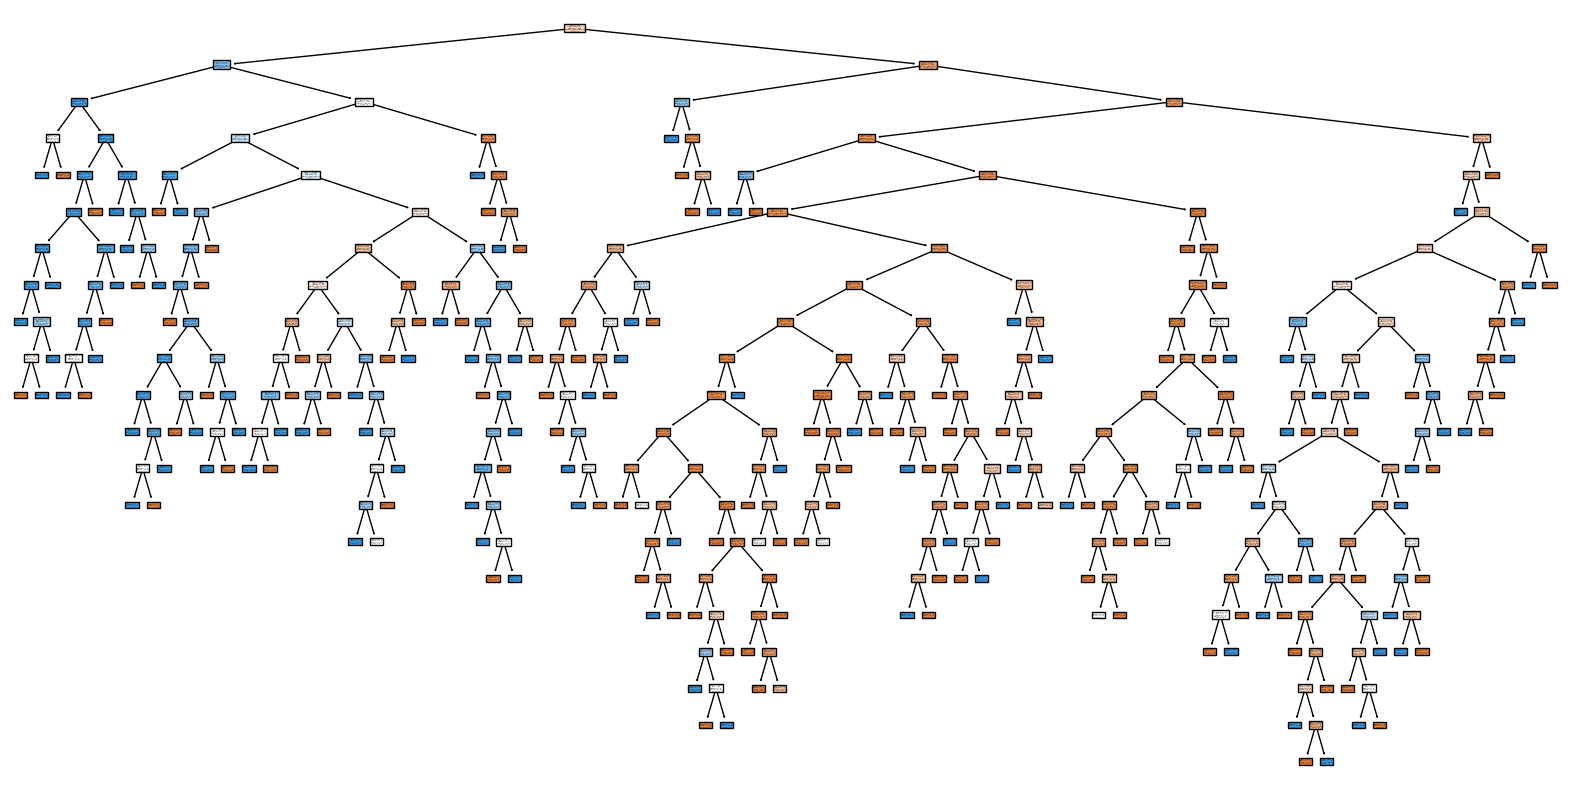

In [41]:
#Print the tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()
# Importing required packages for visualization


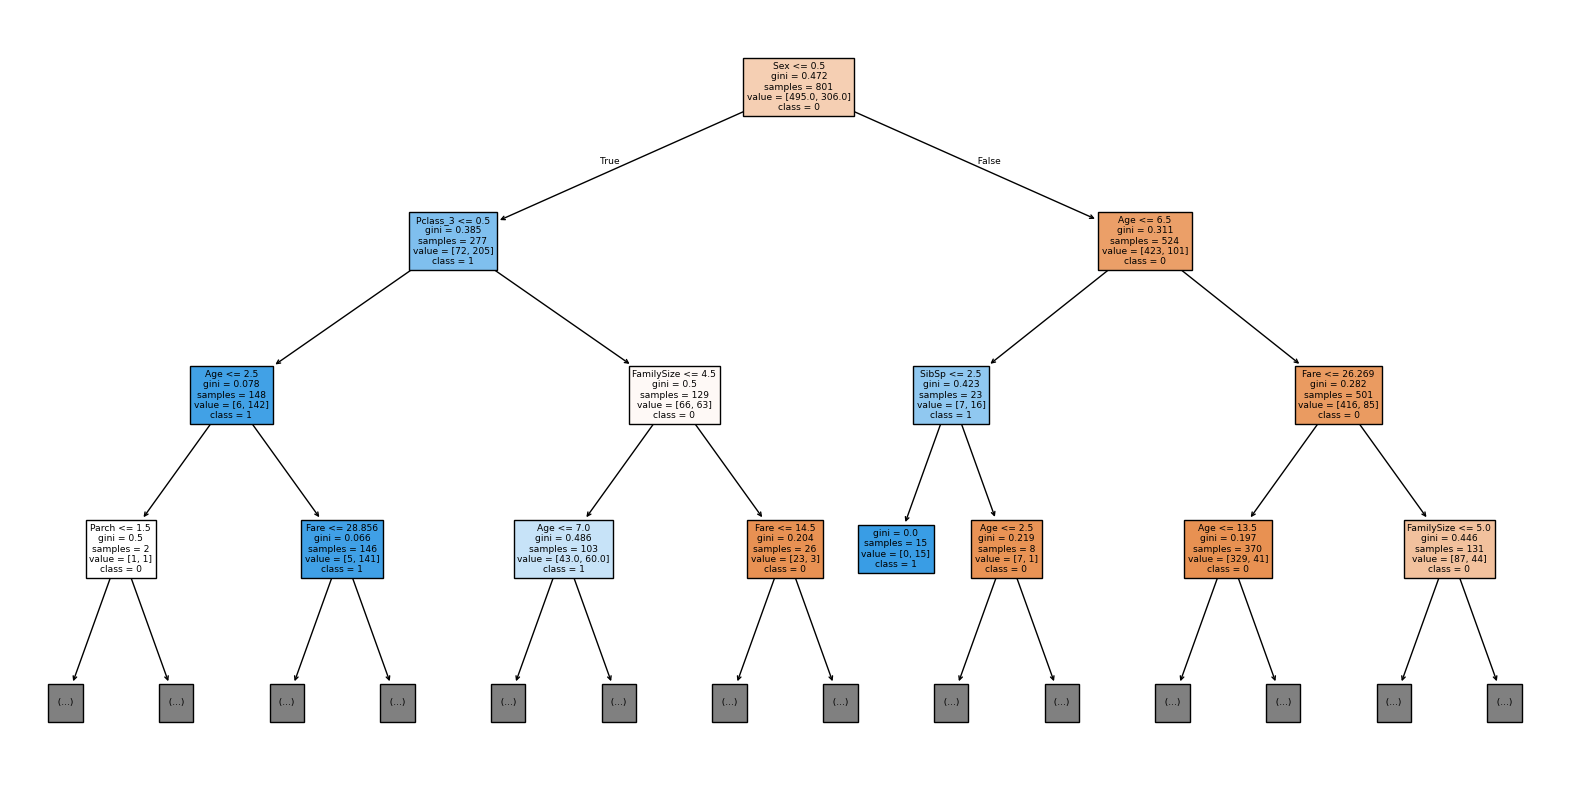

In [42]:
# plotting tree with max_depth=3
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['0', '1'], max_depth=3) 
plt.show()

<img src="tree2.png">

In [46]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score
y_pred = model.predict(X_validation)
# Importing classification report and confusion matrix from sklearn metrics
print(classification_report(y_validation, y_pred))
# Printing classification report
print(accuracy_score(y_validation, y_pred)) 
# Making predictions

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        54
           1       0.60      0.72      0.66        36

    accuracy                           0.70        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.71      0.70      0.70        90

0.7


In [45]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_validation, y_pred))

[[37 17]
 [10 26]]
